# Import Python Libraries and Modules

In [84]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

In [85]:
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [86]:
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [87]:
# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

In [88]:
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [89]:
#Import scikit-Learn module classification report to later use for information about how the system try to classify / lable each record
from sklearn.metrics import classification_report

# Load the  file

In [90]:
filename ='C:/Users/miriamgarcia/Downloads/pima_diabetes.csv'
df=pd.read_csv(filename)

Preprocess Dataset

In [91]:
# count the number of NaN values in each column
print (df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [92]:
#mark zero values as missing or NaN - do not include class
df[[ 'preg' , 'plas' , 'pres' ,'skin', 'test', 'mass', 'pedi', 'age']] \
= df[['preg' , 'plas' , 'pres' ,'skin', 'test', 'mass', 'pedi', 'age' ]].replace(0,np.NaN)
df=df.fillna(df.mean())
# count the number of NaN values in each column
print (df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [93]:
# count the number of NaN values in each column
print (df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


Perform the exploratory data analysis (EDA) on the dataset

In [94]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns
print(df.shape)

(768, 9)


In [95]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)


preg     float64
plas     float64
pres     float64
skin     float64
test     float64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [96]:
#return the first five records / rows of the data set
print(df.head(5))

       preg   plas  pres      skin        test  mass   pedi  age  class
0  6.000000  148.0  72.0  35.00000  155.548223  33.6  0.627   50      1
1  1.000000   85.0  66.0  29.00000  155.548223  26.6  0.351   31      0
2  8.000000  183.0  64.0  29.15342  155.548223  23.3  0.672   32      1
3  1.000000   89.0  66.0  23.00000   94.000000  28.1  0.167   21      0
4  4.494673  137.0  40.0  35.00000  168.000000  43.1  2.288   33      1


In [97]:
#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     4.494673  121.686763   72.405184   29.153420  155.548223   32.457464   
std      2.975395   30.435949   12.096346    8.790942   85.021108    6.875151   
min      1.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      2.000000   99.750000   64.000000   25.000000  121.500000   27.500000   
50%      4.494673  117.000000   72.202592   29.153420  155.548223   32.400000   
75%      6.000000  140.250000   80.000000   32.000000  155.548223   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [98]:
#class distribution i.e. how many records are in each class
print(df.groupby('class').size())

class
0    500
1    268
dtype: int64


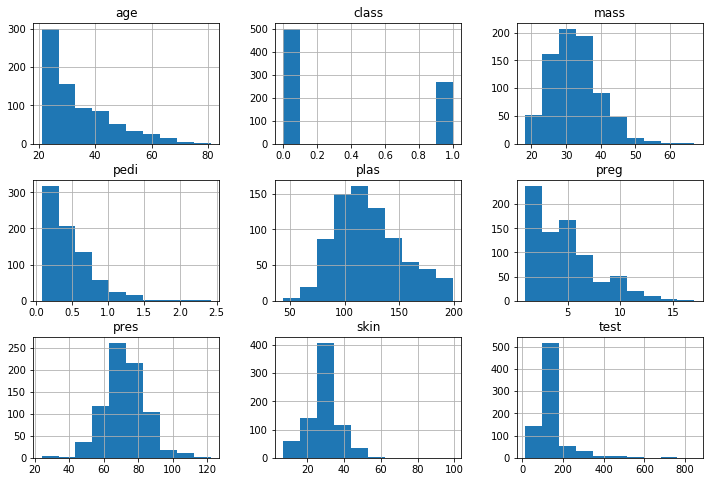

In [99]:
#plot histogram of each numeric variable / attribute in the data set
df.hist(figsize=(12, 8))
pyplot.show()

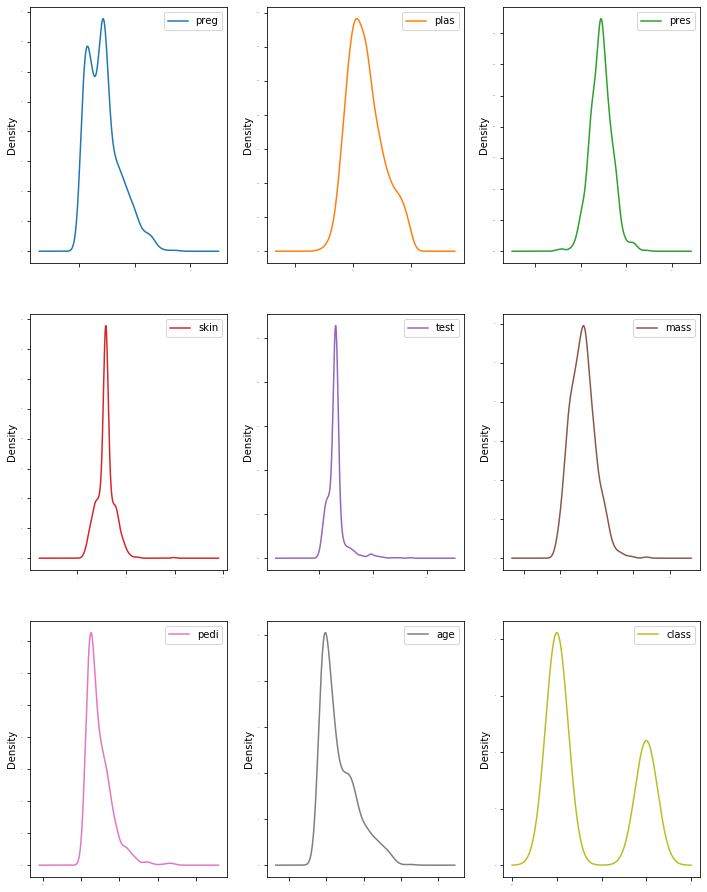

In [100]:
# generate density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()

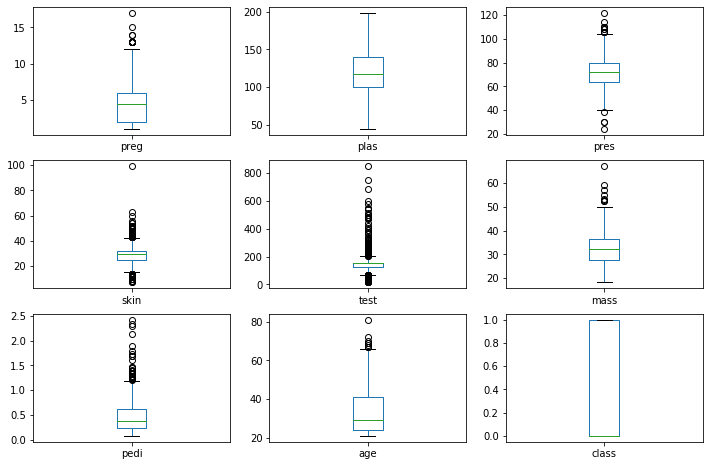

In [101]:
# generate box plots of each numeric variable / attribute in the data set
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()

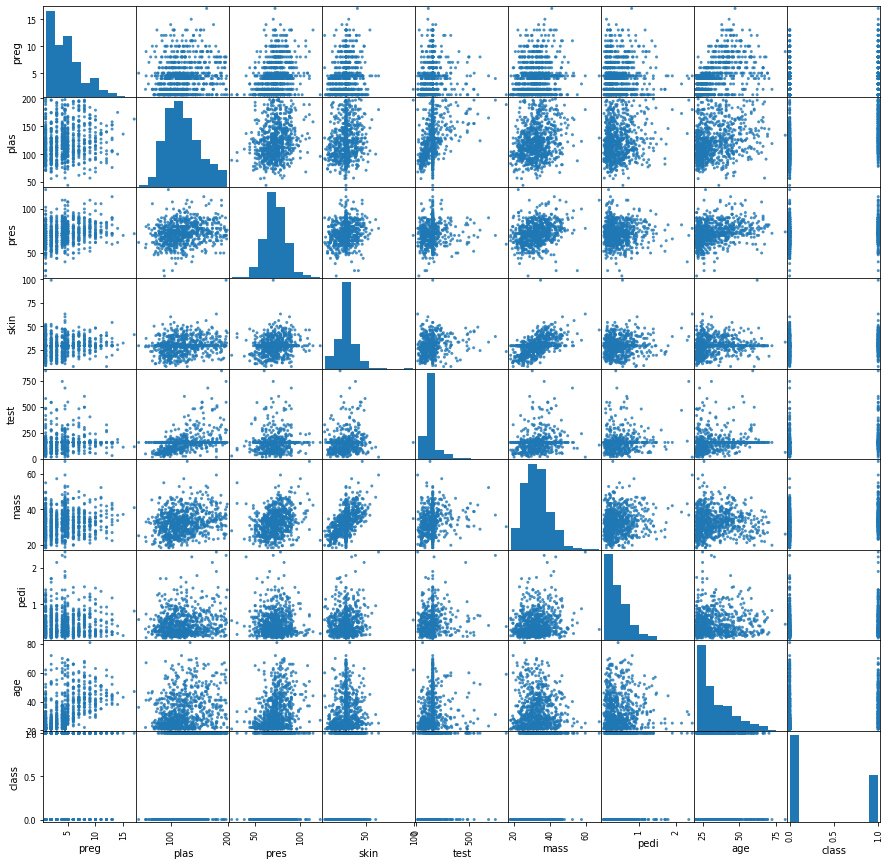

In [102]:
# generate scatter plot matrix of each numeric variable / attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

# Separate Dataset into Input & Output NumPy arrays

In [103]:
# store dataframe values into a numpy array
array = df.values
# separate array into input and output by slicing
# for X(input) [:, 0:8] --> all the rows, columns from 0 - 8 
# these are the independent variables or predictors
X = array[:,0:8]
# for Y(input) [:, 8] --> all the rows, column 8
# this is the value we are trying to predict
Y = array[:,8]

In [104]:
test_size =0.33
seed=4

In [105]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=test_size, random_state=seed)

In [106]:
from sklearn.preprocessing import LabelEncoder
encoder_train =LabelEncoder()
encoder_train.fit(Y_train)
encoded_Y_train =encoder_train.transform(Y_train)

In [107]:
from sklearn.preprocessing import LabelEncoder
encoder_train =LabelEncoder()

In [108]:
encoder_train.fit(Y_train)

LabelEncoder()

# Build and Train the Model

In [109]:
# Import scikit-Learn module for the algorithm/modeL: Logistic Regression
from sklearn.linear_model import LogisticRegression
#build the model
model = LogisticRegression()
# train the model using the training sub-dataset
model.fit(X_train, Y_train)
#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       171
         1.0       0.74      0.66      0.70        83

    accuracy                           0.81       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.81      0.81      0.81       254



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Score the accuracy of the model

In [110]:
#score the accuracy leve
result = model.score(X_test, Y_test)
#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 81.496%


# Classify/Predict Model 1

In [111]:
    #Pregnancy = 6.0
    #plasma = 110
    #Blood pressure = 68
    #Skin thickness = 15
    #Insulin = 85
    #BMI =18
    #diabetespedigree = 0.5
    #Age =38

model.predict([[6.0, 110, 68, 15,85,18,0.5,38]])

array([0.])

# Evaluate the model using the 10-fold cross-validation technique.

In [112]:
# evaluate the algorythm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10
# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 4


In [113]:
kfold = KFold(n_splits, random_state=seed)
scoring = 'accuracy'

In [114]:
# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 0.769 (0.049)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# Classify/Predict Model 2

In [115]:
model.predict([[5, 130, 59, 18,70,16,0.3,31]])

array([0.])

# Evaluate the model using the 10-fold cross-validation technique.

In [116]:
# evaluate the algorythm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10
# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 4

In [117]:
kfold = KFold(n_splits, random_state=seed)
scoring = 'accuracy'

In [118]:
# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 0.769 (0.049)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [119]:
R_squared = model.score(X_test, Y_test)
print(R_squared)

0.8149606299212598
